# Toy model, Real Data

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import math
import seaborn as sb

In [2]:
infect_rate = 0.07

## Importing COVID

In [3]:
covid = pd.read_csv('covid19probablecases.csv')

dates = covid["date"].unique()

cases_by_day = np.zeros(len(dates))

for i in range(0,len(dates)):
    cases_by_day[i] = int(sum(covid[covid["date"]==dates[i]]["cumulative_probable_cases"]))


FileNotFoundError: [Errno 2] No such file or directory: 'covid19probablecases.csv'

In [4]:
plt.figure()
cases_by_day_df = pd.DataFrame(cases_by_day)    

sb.scatterplot(data = cases_by_day_df,
                x = list(cases_by_day_df.index),
                y = 0)
line = np.zeros(len(dates))
sb.scatterplot(x=list(cases_by_day_df.index), y=line)
plt.figure()



NameError: name 'cases_by_day' is not defined

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

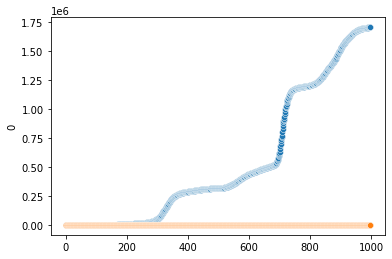

<Figure size 432x288 with 0 Axes>

In [531]:
plt.figure()
cases_by_day_df = pd.DataFrame(cases_by_day)    

sb.scatterplot(data = cases_by_day_df,
                x = list(cases_by_day_df.index),
                y = 0)
line = np.zeros(len(dates))
sb.scatterplot(x=list(cases_by_day_df.index), y=line)
plt.figure()


In [543]:
cases_by_day_df.iat[709,0]

800980.0

##  [Importing data]

In [613]:
data_CA = pd.read_excel('LA_and_LA_adjacent_commuting_data.xlsx')

data_CA.head(5)

,Home County,Workplace County,Commuters
0,Alameda County,Alameda County,462270
1,Alameda County,Contra Costa County,41010
2,Alameda County,El Dorado County,11
3,Alameda County,Fresno County,97
4,Alameda County,Humboldt County,61


## Start the first iteration here

In [614]:
commuters_toy = data_CA

In [615]:
commuters_toy

,Home County,Workplace County,Commuters
0,Alameda County,Alameda County,462270
1,Alameda County,Contra Costa County,41010
2,Alameda County,El Dorado County,11
3,Alameda County,Fresno County,97
4,Alameda County,Humboldt County,61
...,...,...,...
1692,Yuba County,Solano County,90
1693,Yuba County,Stanislaus County,23
1694,Yuba County,Sutter County,4803
1695,Yuba County,Yolo County,635


In [616]:
names = data_CA["Home County"].unique()

## Get total commuters 

total_commuters = np.zeros(len(names))

for i in range(0,len(names)):
    total_commuters[i] = int(sum(data_CA[data_CA["Home County"]==names[i]]["Commuters"]))

zeros = np.zeros(len(names))


empty_data_toy = { 'County name': names, 
        "Total Commuters": total_commuters,
        "Non-infected": total_commuters,
        "Infected (Work)": zeros,
      "Infected (Quarantine)": zeros}

SIR_df_toy = pd.DataFrame(empty_data_toy)

SIR_df_toy.head(5)


,County name,Total Commuters,Non-infected,Infected (Work),Infected (Quarantine)
0,Alameda County,716516.0,716516.0,0.0,0.0
1,Alpine County,263.0,263.0,0.0,0.0
2,Amador County,11839.0,11839.0,0.0,0.0
3,Butte County,86296.0,86296.0,0.0,0.0
4,Calaveras County,15461.0,15461.0,0.0,0.0


In [617]:
commuter_population = sum(total_commuters)
commuter_population

16786883.0

In [618]:
new_infected_at_workplace = pd.DataFrame(np.zeros(len(names), dtype = int))
new_infected_at_workplace.insert(0, "Victim Counties", names)
new_infected_at_workplace.rename(columns = {0:'Newly Infected'}, inplace = True)
new_infected_at_workplace.head(5)

,Victim Counties,Newly Infected
0,Alameda County,0
1,Alpine County,0
2,Amador County,0
3,Butte County,0
4,Calaveras County,0


In [629]:
number_of_days = 200

days = np.zeros(number_of_days)

total_infected_pre = { "Total Infection": days}
total_infected = pd.DataFrame(total_infected_pre)   
total_infected.head(1)

,Total Infection
0,0.0


In [630]:
Test_1 = round(.9 * commuter_population)
Test_1

15108195

## BASELINE: When we drop 5 cases in Alameda County, how long does it take for 90% of our total commuters to get infected? [around 15 000 people]

In [631]:
### MISTAKE HERE, need to subtract the infected

In [632]:
Drop_in_infections = "Alameda County" # Initial infection. Can pick randomly or specify

New_infected_countIES = pd.DataFrame(np.array(["Alameda County"]))

SIR_df_toy.at[0,"Infected (Work)"] = 5 ## 0 because of stupid row names
SIR_df_toy.head(5)

,County name,Total Commuters,Non-infected,Infected (Work),Infected (Quarantine)
0,Alameda County,669793.0,617155.0,5.0,46723.0
1,Alpine County,207.0,151.0,0.0,56.0
2,Amador County,11399.0,10732.0,227.0,440.0
3,Butte County,70658.0,54940.0,80.0,15638.0
4,Calaveras County,12460.0,9457.0,2.0,3001.0


## Start the second iteration here

In [633]:
for j in range(0,number_of_days):
    
    print("Day: ", j)

    
    victim_countIES = pd.DataFrame(np.zeros(len(New_infected_countIES), dtype = int))

    victim_countIES.insert(1, "Coming from", np.zeros(len(New_infected_countIES)))

    for i in range(0, len(New_infected_countIES)):
        New_infected = New_infected_countIES.iat[i,0]
        temp = (pd.DataFrame(commuters_toy.loc[commuters_toy["Home County"].str.contains(New_infected)])).sample(axis = "rows")
        victim_countIES.iat[i,0] =temp.iat[0,1]
        victim_countIES.iat[i,1] =New_infected_countIES.iat[i,0]
        
    victim_workplaCES= pd.DataFrame(np.zeros(len(New_infected_countIES), dtype = int))
    victim_workplaCES.insert(0, "Victim Counties", np.zeros(len(New_infected_countIES)))

    ## Finding the common array 
    for i in range(0, len(New_infected_countIES)): 
        #print(np.where(commuters_toy["Home County"].str.contains(victim_countIES.iat[i,0])))
        #print(np.where(commuters_toy["Workplace County"].str.contains(victim_countIES.iat[i,0])))
        victim_workplaCES.iat[i,0] = victim_countIES.iat[i,0]
        victim_workplaCES.iat[i,1] = np.intersect1d(np.where(commuters_toy["Home County"].str.contains(victim_countIES.iat[i,0])),np.where(commuters_toy["Workplace County"].str.contains(victim_countIES.iat[i,0])))
        
    #New Infected people 
    for i in range(0, len(SIR_df_toy)):
        if (new_infected_at_workplace.at[i,"Victim Counties"] in victim_workplaCES[["Victim Counties"]].values): 

            current_county = new_infected_at_workplace.at[i,"Victim Counties"]

            workplace_people = commuters_toy.at[int(victim_workplaCES.loc[victim_workplaCES["Victim Counties"]==current_county,0].iloc[0]),"Commuters"]
                        
            infection_origin = victim_countIES.loc[victim_countIES[0]==current_county,"Coming from"].iloc[0]
            
            infectors = SIR_df_toy.loc[SIR_df_toy["County name"]==infection_origin,"Infected (Work)"].iloc[0]
            
            new_infected_people = round((workplace_people/(infectors*infectors) * (infect_rate * infectors)))
            if (new_infected_people > workplace_people):
                new_infected_people = workplace_people
                
            new_infected_at_workplace.at[i,"Newly Infected"] = new_infected_people

            change_commuters_index = np.intersect1d(np.where(commuters_toy["Home County"].str.contains(infection_origin)),np.where(commuters_toy["Workplace County"].str.contains(current_county)))


            people_going_to_quarantine = round(0.6 * infectors)
            if (current_county == infection_origin and people_going_to_quarantine > workplace_people):
                people_going_to_quarantine = workplace_people
            
            commuters_change = commuters_toy.at[int(change_commuters_index),"Commuters"] - people_going_to_quarantine
            if (commuters_change < 0):
                commuters_change = 0
                
            commuters_toy.at[int(change_commuters_index),"Commuters"] = commuters_change
                        
                
    ## Update data sets 
    for i in range(0, len(new_infected_at_workplace)):
        move_infected = round(0.6 * SIR_df_toy.at[i,"Infected (Work)"])

        SIR_df_toy.at[i,"Infected (Quarantine)"] = SIR_df_toy.at[i,"Infected (Quarantine)"] + move_infected #1

        SIR_df_toy.at[i,"Total Commuters"] = SIR_df_toy.at[i,"Total Commuters"] - move_infected #2
        if (SIR_df_toy.at[i,"Total Commuters"] < 0):
            SIR_df_toy.at[i,"Total Commuters"] = 0
            
        SIR_df_toy.at[i,"Non-infected"] =  SIR_df_toy.at[i,"Non-infected"] - move_infected #3
        SIR_df_toy.at[i,"Infected (Work)"] = SIR_df_toy.at[i,"Infected (Work)"] - move_infected + new_infected_at_workplace.at[i,"Newly Infected"] # 4
        SIR_df_toy.at[i,"Non-infected"] = SIR_df_toy.at[i,"Non-infected"] - new_infected_at_workplace.at[i,"Newly Infected"] # 5
        if(SIR_df_toy.at[i,"Non-infected"] < 0):
            SIR_df_toy.at[i,"Non-infected"] = 0
            
    
    total_infected.at[j, "Total Infection"] = sum(SIR_df_toy["Infected (Work)"]) + sum(SIR_df_toy["Infected (Quarantine)"])
    
    New_infected_countIES = new_infected_at_workplace[new_infected_at_workplace["Newly Infected"] != 0]
    

Day:  0
Day:  1
Day:  2
Day:  3
Day:  4
Day:  5
Day:  6
Day:  7
Day:  8
Day:  9
Day:  10
Day:  11
Day:  12
Day:  13
Day:  14
Day:  15
Day:  16
Day:  17
Day:  18
Day:  19
Day:  20
Day:  21
Day:  22
Day:  23
Day:  24
Day:  25
Day:  26
Day:  27
Day:  28
Day:  29
Day:  30
Day:  31
Day:  32
Day:  33
Day:  34
Day:  35
Day:  36
Day:  37
Day:  38
Day:  39
Day:  40
Day:  41
Day:  42
Day:  43
Day:  44
Day:  45
Day:  46
Day:  47
Day:  48
Day:  49
Day:  50
Day:  51
Day:  52
Day:  53
Day:  54
Day:  55
Day:  56
Day:  57
Day:  58
Day:  59
Day:  60
Day:  61
Day:  62
Day:  63
Day:  64
Day:  65
Day:  66
Day:  67
Day:  68
Day:  69
Day:  70
Day:  71
Day:  72
Day:  73
Day:  74
Day:  75
Day:  76
Day:  77
Day:  78
Day:  79
Day:  80
Day:  81
Day:  82
Day:  83
Day:  84
Day:  85
Day:  86
Day:  87
Day:  88
Day:  89
Day:  90
Day:  91
Day:  92
Day:  93
Day:  94
Day:  95
Day:  96
Day:  97
Day:  98
Day:  99
Day:  100
Day:  101
Day:  102
Day:  103
Day:  104
Day:  105
Day:  106
Day:  107
Day:  108
Day:  109
Day:  110


In [638]:
commuters_toy.head()

,Home County,Workplace County,Commuters
0,Alameda County,Alameda County,452071
1,Alameda County,Contra Costa County,23591
2,Alameda County,El Dorado County,0
3,Alameda County,Fresno County,0
4,Alameda County,Humboldt County,0


In [639]:
SIR_df_toy.head()

,County name,Total Commuters,Non-infected,Infected (Work),Infected (Quarantine)
0,Alameda County,351362.0,0.0,1253.0,365154.0
1,Alpine County,0.0,0.0,0.0,323.0
2,Amador County,7048.0,2230.0,27.0,4791.0
3,Butte County,16783.0,0.0,60.0,69513.0
4,Calaveras County,8338.0,1092.0,123.0,7123.0


In [640]:
New_infected_countIES.head()

,Victim Counties,Newly Infected
0,Alameda County,75
2,Amador County,17
3,Butte County,32
4,Calaveras County,87
5,Colusa County,5


<AxesSubplot:ylabel='Total Infection'>

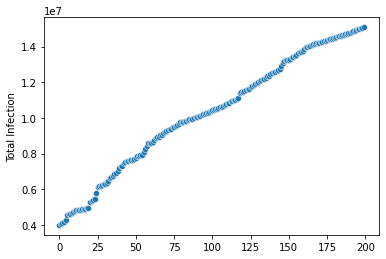

In [641]:
sb.scatterplot(data = total_infected,
                x = list(total_infected.index),
                y = "Total Infection")

In [652]:
pd.set_option('display.max_rows', 200)
print(total_infected.to_markdown)

<bound method DataFrame.to_markdown of      Total Infection
0          3991513.0
1          4059675.0
2          4100048.0
3          4149376.0
4          4243398.0
5          4550544.0
6          4578832.0
7          4603857.0
8          4641331.0
9          4693092.0
10         4758949.0
11         4807167.0
12         4819551.0
13         4830779.0
14         4842202.0
15         4868951.0
16         4901867.0
17         4910210.0
18         4922837.0
19         4946145.0
20         5271057.0
21         5340267.0
22         5387683.0
23         5464358.0
24         5772354.0
25         6131127.0
26         6155710.0
27         6177000.0
28         6230678.0
29         6279122.0
30         6298434.0
31         6350646.0
32         6478268.0
33         6641531.0
34         6688714.0
35         6759034.0
36         6862091.0
37         6921970.0
38         7031183.0
39         7213160.0
40         7279812.0
41         7309695.0
42         7470868.0
43         7520004.0
44         75641